## Introduction to word2vec assignment

For a visualization of word2vec training (including loss computations) have a look at this [cornell cs course animatioon](https://www.cs.cornell.edu/courses/cs4782/2026sp/demos/word2vec/) of training a toy corpus.

This notebook assumes you have Radim Rehurek's `gensim` module installed.
For some helpful tutorials see [Rehurek's tutorials page.](https://radimrehurek.com/gensim/auto_examples/index.html#documentation)

##  Loading pretrained vectors

In [3]:
# 100 MB not very good
#wordset = 'glove-twitter-25'
# 1  GB
import gensim
import gensim.downloader
wordset = 'fasttext-wiki-news-subwords-300'
fast_vectors = gensim.downloader.load(wordset)

In [4]:
model2 = fast_vectors
model2

In [126]:
##  a vocab of 999,999  vector dimensionality 300
wvecs = model2.vectors
wvecs.shape

(999999, 300)

Fetch the first 30 components of a word vector:

In [128]:
model2["woman"][:30]

array([-0.089032 ,  0.0070157,  0.043966 ,  0.0095868, -0.0065863,
        0.021975 ,  0.03802  , -0.11633  ,  0.086124 ,  0.043658 ,
        0.068408 ,  0.016394 ,  0.044093 ,  0.0015541, -0.11214  ,
       -0.014895 ,  0.044228 , -0.084028 ,  0.017321 ,  0.035936 ,
       -0.020162 , -0.0071014, -0.069285 ,  0.081374 , -0.0078895,
       -0.026504 ,  0.048517 ,  0.083375 ,  0.022454 , -0.044504 ],
      dtype=float32)

In [12]:
import pandas as pd

def find_good_model_words (model,words=None,url=None):
    """
    Use Frequency sorted BNDS word list to get a list of frequent (well-modeled words)
    and winnow it down to those we have vectors for.
    """
    if url is None:
        url = "https://www.kilgarriff.co.uk/BNClists/lemma.num"
    df = pd.read_csv(url,sep = " ",header=None,index_col=None,names=("rank freq word pos".split()))
    words = df["word"].values
    res = []
    for wd in words:
        if wd in res:
            continue
        else:
            res.append(wd)
    words = res
    search_wds = [wd for wd in words if wd in model.key_to_index]
    search_space = [model[wd] for wd in words if wd in search_wds]
    print(f"{len(search_wds)} found")
    return search_wds, search_space, words

# First time in executing this cell provide value None
words = None
search_wds,search_space,words = find_good_model_words(model2,words,url="lemma.num.txt")

5464 found


In [13]:
#model2 = glove_vectors
#trained_model.most_similar(positive=['woman', 'king'], negative=['man'])
adj_v,adv_v = model2["apparent"],model2["happy"]
new_adj_v = model2["apparently"]
#delta_v = new_adj_v - adj_v
mean_v = (adj_v+adv_v)/2
sims = model2.cosine_similarities(new_adj_v+mean_v,search_space)
#sims = model.cosine_similarities(new_adj_v+delta_v,search_space)
sim_ranks = sims.argsort()
for idx in sim_ranks[-20:]:
    try:
        print(search_wds[idx])
    except:
        print(idx)

undoubtedly
certainly
obvious
curiously
really
sadly
surprisingly
strangely
surely
presumably
unhappy
clearly
indeed
doubtless
evidently
happy
apparent
seemingly
obviously
apparently


In [15]:
model2.most_similar(positive=["fair","sad"],negative=["fairly"])

[('sorrowful', 0.59034663438797),
 ('saddest', 0.58882737159729),
 ('happy-sad', 0.5876821875572205),
 ('shameful', 0.5693203210830688),
 ('tragic', 0.5639909505844116),
 ('regretful', 0.5631633996963501),
 ('afair', 0.5611279606819153),
 ('sadder', 0.5494034886360168),
 ('joyous', 0.5484243035316467),
 ('Sad', 0.5468201637268066)]

In [23]:
model2.most_similar(positive=["sad","fair"],negative=["sadly"],restrict_vocab=5_000,topn=50)

[('reasonable', 0.5873574614524841),
 ('honest', 0.5607374310493469),
 ('nice', 0.5430527925491333),
 ('good', 0.539574384689331),
 ('logical', 0.5187816023826599),
 ('happy', 0.5185455679893494),
 ('funny', 0.51633620262146),
 ('beautiful', 0.5101391673088074),
 ('neutral', 0.5072100162506104),
 ('Fair', 0.5033652782440186),
 ('safe', 0.49781182408332825),
 ('wonderful', 0.49733901023864746),
 ('terrible', 0.48732951283454895),
 ('tough', 0.4870515763759613),
 ('ridiculous', 0.48654699325561523),
 ('positive', 0.48440638184547424),
 ('kind', 0.48114338517189026),
 ('great', 0.48003271222114563),
 ('silly', 0.47839200496673584),
 ('sensitive', 0.47760578989982605),
 ('healthy', 0.47702547907829285),
 ('bad', 0.4725381135940552),
 ('stupid', 0.4677143692970276),
 ('fun', 0.46476390957832336),
 ('calm', 0.46096378564834595),
 ('accurate', 0.4584159851074219),
 ('perfect', 0.45796850323677063),
 ('efficient', 0.4572794437408447),
 ('natural', 0.45469024777412415),
 ('critical', 0.45458930

In [24]:
model2.similarity('fair', 'fairly')

0.5956114

In [19]:
model2.most_similar(positive=['man','woman'],negative=["king"],topn=50,restrict_vocab=5_000)

[('girl', 0.5901464819908142),
 ('person', 0.56529301404953),
 ('women', 0.5642783045768738),
 ('men', 0.5456959009170532),
 ('female', 0.5112601518630981),
 ('guy', 0.5010284185409546),
 ('worker', 0.4937118887901306),
 ('male', 0.4934370517730713),
 ('boy', 0.49050837755203247),
 ('young', 0.48891302943229675),
 ('husband', 0.4865119755268097),
 ('soldier', 0.47855663299560547),
 ('wife', 0.4749095141887665),
 ('human', 0.4674159288406372),
 ('mother', 0.4656803607940674),
 ('child', 0.4608651101589203),
 ('victim', 0.45639142394065857),
 ('individual', 0.4476111829280853),
 ('couple', 0.44142240285873413),
 ('persons', 0.4406763017177582),
 ('herself', 0.43136319518089294),
 ('politician', 0.4308170974254608),
 ('partner', 0.43012192845344543),
 ('one', 0.42984405159950256),
 ('she', 0.42247137427330017),
 ('someone', 0.4217567443847656),
 ('patient', 0.42001113295555115),
 ('actress', 0.41916969418525696),
 ('citizen', 0.4172400236129761),
 ('daughter', 0.41623455286026),
 ('doctor

In [25]:
model2.most_similar(positive=["apparent","happy"],negative=["apparently"])

[('joyful', 0.6441096067428589),
 ('unhappy', 0.6291165947914124),
 ('joyous', 0.628678023815155),
 ('happy-happy', 0.6118642091751099),
 ('happy-sad', 0.6046980619430542),
 ('happier', 0.604619562625885),
 ('happy-ever-after', 0.5979535579681396),
 ('not-so-happy', 0.5914016366004944),
 ('cheerful', 0.5874642729759216),
 ('sad', 0.5846496820449829)]

In [109]:
#model.most_similar(positive=['man','king'],negative="woman",topn=50)
model.most_similar(positive=["fair","sad"],negative=["fairly"])

[('sorry', 0.4654707908630371),
 ('saddest', 0.4602561295032501),
 ('bittersweet', 0.4432019591331482),
 ('shameful', 0.43777719140052795),
 ('saddens_me', 0.4363546669483185),
 ('unfortunate', 0.434783399105072),
 ('saddened', 0.43093985319137573),
 ('Sad', 0.4295103847980499),
 ('heartbreaking', 0.42069822549819946),
 ('sadden', 0.4182289242744446)]

## Basic word similarities

#### hs = 0

In [26]:
model2.similarity('woman', 'girl')

0.75772464

In [27]:
model2.similarity('woman', 'boy')

0.62647694

In [28]:
model2.similarity('man', 'boy')

0.67477584

In [29]:
model2.similarity('man', 'girl')

0.6418483

In [30]:
model2.similarity('boy', 'girl')

0.8773635

In [31]:
model2.similarity('man', 'woman')

0.8119809

In [39]:
import sklearn
from sklearn import decomposition, manifold
import numpy as np

#search_wds,search_space
search_space = np.array(search_space)
## PCA reduction
red1 = decomposition.PCA(n_components=25)
print("Doing PCA reduction")
search_space2 = red1.fit_transform(search_space)
print("PCA reduction done")

# TSNE reduction
print("Doing TSNE reduction")
red2 = manifold.TSNE(n_components=2)
rint("TSNE reduction done")
search_space3 = red2.fit_transform(search_space2)
#(5464, 2)
print(f"Final data shape: {search_space3.shape}")

In [60]:
sorted(word_samp)

['book',
 'both',
 'business',
 'car',
 'change',
 'development',
 'every',
 'eye',
 'form',
 'head',
 'hear',
 'help',
 'home',
 'important',
 'include',
 'information',
 'interest',
 'level',
 'long',
 'meet',
 'money',
 'month',
 'move',
 'national',
 'night',
 'often',
 'order',
 'pay',
 'percent',
 'perhaps',
 'play',
 'policy',
 'power',
 'question',
 'quite',
 'right',
 'room',
 'run',
 'set',
 'side',
 'social',
 'start',
 'state',
 'though',
 'until',
 'water',
 'whether',
 'write',
 'yet',
 'young']

In [69]:
len(word_samp)

50

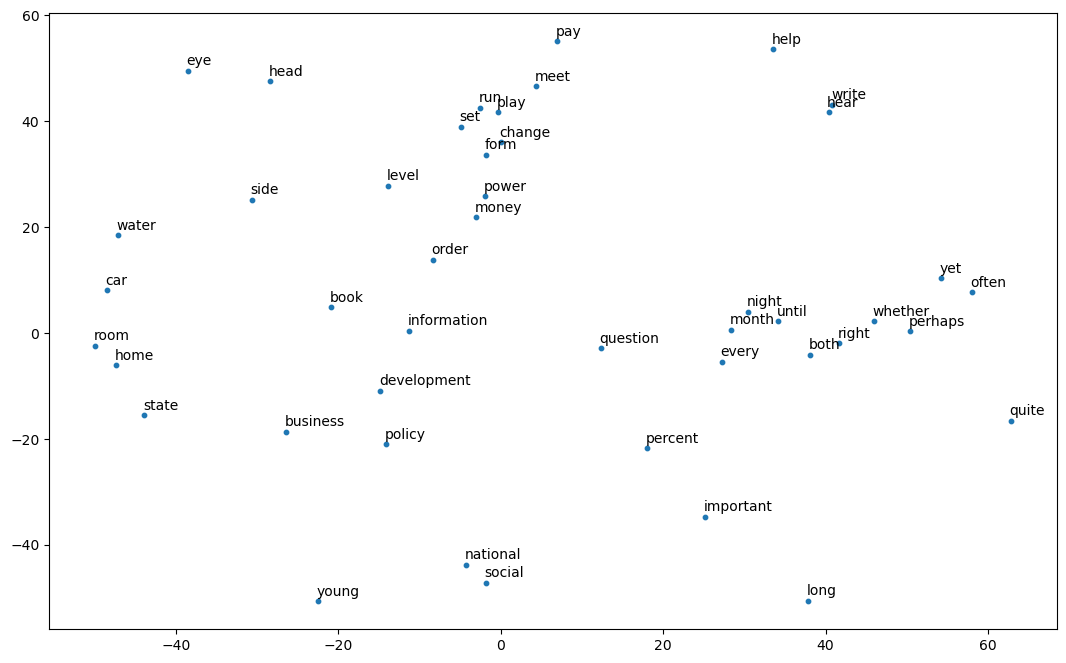

In [75]:
from matplotlib import pyplot as plt

N = 50
start = 200
word_samp = search_wds[start:start+N]
#word_samp = [wd for wd in word_samp if wd not in {"start","though","include","interest"}]
red_vecs_samp = search_space3[start:start+N]
samp = [(wd, red_vecs_samp[i,0],red_vecs_samp[i,1]) for (i,wd) in enumerate(word_samp) \
            if wd not in {"start","though","include","interest","move"}]
#x,y = red_vecs_samp[:,0],red_vecs_samp[:,1]


(fig,ax) = plt.subplots(figsize=(13,8))
wds,xs,ys = zip(*samp)
plt.scatter(xs,ys,s=10)

for (wd,x,y) in samp:
    #print(wd)
    plt.annotate(wd, xy=(x,y), xytext=(-1,4), textcoords="offset points")

#### hs = 1

## Completing an analogy


Complete the analogy *Woman is to man as king is to ??*

$$
\begin{array}{lcl}
v_{\Delta} & =& v_{\text{woman}} - v_{\text{man}}\\
v_{??}  & =& v_{\text{king}} + v_{\Delta}\\
\end{array}
$$

In [84]:
model2.most_similar(positive=['woman', 'king'], negative=['man'],restrict_vocab=10_000)

[('queen', 0.778674840927124),
 ('monarch', 0.6667000651359558),
 ('kings', 0.6497675776481628),
 ('prince', 0.6235989332199097),
 ('ruler', 0.5971586108207703),
 ('lady', 0.5851913690567017),
 ('royal', 0.5821065902709961),
 ('King', 0.5786274075508118),
 ('emperor', 0.5757140517234802),
 ('kingdom', 0.5735507607460022)]

Rarer target words.  Clearly not enough data for this small model.

In [78]:
model2.most_similar(positive=['doe', 'buck'],negative=['cow'],restrict_vocab=5_000)

[('does', 0.36418426036834717),
 ('shall', 0.3268805742263794),
 ('will', 0.3261164128780365),
 ('pass', 0.3224692642688751),
 ('can', 0.31844210624694824),
 ('do', 0.31771406531333923),
 ('cannot', 0.3131857216358185),
 ('did', 0.30683064460754395),
 ('doesn', 0.3023470938205719),
 ('should', 0.30144184827804565)]

## Nearest neighbors

Nearest neighbor list for *woman*:

In [85]:
model2.most_similar(positive=['woman'],topn=50)#,restrict_vocab=10_000)

[('man', 0.8119807243347168),
 ('woman--', 0.7959198951721191),
 ('lady', 0.7750157117843628),
 ('girl', 0.7577246427536011),
 ('woman-', 0.7568190097808838),
 ('womans', 0.7453511953353882),
 ('women', 0.7260429859161377),
 ('child-woman', 0.7223398089408875),
 ('trans-woman', 0.7164039015769958),
 ('woman-child', 0.7128437161445618),
 ('-woman', 0.7116371393203735),
 ('womanish', 0.7041031718254089),
 ('female', 0.7014045715332031),
 ('tribeswoman', 0.6959226131439209),
 ('woma', 0.6955699324607849),
 ('woman.', 0.6946783065795898),
 ('womanist', 0.6915345788002014),
 ('half-woman', 0.6891195178031921),
 ('women--', 0.6889522075653076),
 ('husband', 0.6878941655158997),
 ('conwoman', 0.6860290169715881),
 ('man-woman', 0.6847579479217529),
 ('woman-to-woman', 0.6843294501304626),
 ('women--and', 0.6834239363670349),
 ('townswoman', 0.6830413341522217),
 ('strongwoman', 0.6830369830131531),
 ('person', 0.6830306649208069),
 ('woman-hater', 0.6826941967010498),
 ('women--a', 0.68109005

In [86]:
model2.most_similar(positive=['computer'],topn=50)#,restrict_vocab=10_000)

[('computers', 0.8472652435302734),
 ('non-computer', 0.8156518340110779),
 ('mini-computer', 0.8099768161773682),
 ('micro-computer', 0.7727647423744202),
 ('super-computer', 0.7624921798706055),
 ('pre-computer', 0.7617331743240356),
 ('computor', 0.7485800385475159),
 ('computery', 0.7484371662139893),
 ('home-computer', 0.7476083636283875),
 ('computerless', 0.7416372895240784),
 ('multi-computer', 0.7372698187828064),
 ('computer-science', 0.7365379929542542),
 ('computer-system', 0.7344843745231628),
 ('computer-network', 0.7338772416114807),
 ('computer-screen', 0.7325526475906372),
 ('computer-use', 0.7318693995475769),
 ('microcomputer', 0.7310342192649841),
 ('software', 0.7308359146118164),
 ('computer-', 0.7259715795516968),
 ('computer-illiterate', 0.7247892618179321),
 ('comuter', 0.7225185036659241),
 ('anti-computer', 0.7216165661811829),
 ('computer-oriented', 0.720827579498291),
 ('computer-based', 0.7186134457588196),
 ('computer-programming', 0.7182703614234924),
 (

In [87]:
model2.most_similar(positive=['twitter'],topn=50,restrict_vocab=10_000)
#[(wd,sc) for (wd,sc) in model2.most_similar(positive=['twitter'],topn=100,restrict_vocab=10_000) 
#    if "twitt" not in wd.lower()]

[('Twitter', 0.8208357095718384),
 ('Facebook', 0.6506764888763428),
 ('blog', 0.5960510969161987),
 ('blogs', 0.5761139988899231),
 ('YouTube', 0.5179937481880188),
 ('chat', 0.4908485412597656),
 ('news', 0.4890054166316986),
 ('web', 0.47877150774002075),
 ('website', 0.47871994972229004),
 ('email', 0.47649359703063965),
 ('forums', 0.474396288394928),
 ('video', 0.47155702114105225),
 ('feed', 0.46904176473617554),
 ('internet', 0.46882709860801697),
 ('fan', 0.4673312306404114),
 ('webpage', 0.4659402072429657),
 ('celebrity', 0.46103063225746155),
 ('post', 0.45802173018455505),
 ('app', 0.45201411843299866),
 ('profile', 0.451845645904541),
 ('troll', 0.44934016466140747),
 ('posts', 0.4476035237312317),
 ('emails', 0.44681450724601746),
 ('fake', 0.444367378950119),
 ('wiki', 0.439891517162323),
 ('info', 0.43771278858184814),
 ('videos', 0.43330883979797363),
 ('flash', 0.4328845739364624),
 ('joke', 0.43183329701423645),
 ('followers', 0.4311433732509613),
 ('bio', 0.4307832

In [32]:
model2.most_similar(positive=['computer'],topn=50)#,restrict_vocab=10_000)

[('computers', 0.7003621459007263),
 ('hardware', 0.6954243779182434),
 ('computing', 0.6706249117851257),
 ('graphics', 0.6698020696640015),
 ('cnc', 0.6208446025848389),
 ('spacewar', 0.6068115830421448),
 ('pc', 0.6044665575027466),
 ('vectrex', 0.6031247973442078),
 ('hardwired', 0.5971214771270752),
 ('amiga', 0.5966660976409912),
 ('integrator', 0.5960801839828491),
 ('video', 0.5953434705734253),
 ('csirac', 0.5865309834480286),
 ('software', 0.5855605006217957),
 ('datasheet', 0.5847772359848022),
 ('console', 0.5844710469245911),
 ('mechatronics', 0.5783132314682007),
 ('vmware', 0.5778961777687073),
 ('scummvm', 0.5778366923332214),
 ('interfacing', 0.5582197904586792),
 ('programmer', 0.5580490231513977),
 ('games', 0.5570300221443176),
 ('systran', 0.5554400086402893),
 ('samplers', 0.5551992654800415),
 ('minicomputers', 0.553703784942627),
 ('supercard', 0.5524625182151794),
 ('workstation', 0.5507913827896118),
 ('hypertalk', 0.5503132939338684),
 ('intellimouse', 0.5473

In [33]:
L = model.wv.most_similar(positive=['woman'],topn=100,restrict_vocab=10_000)
#[i for (i,(wd,sc)) in enumerate(L[:100]) if wd == "girl"]
L

[('girl', 0.6405647993087769),
 ('man', 0.6274044513702393),
 ('child', 0.5868110656738281),
 ('herself', 0.5588076710700989),
 ('children', 0.5460731983184814),
 ('mother', 0.5288265347480774),
 ('she', 0.5228410959243774),
 ('pregnant', 0.5205014944076538),
 ('young', 0.5200008749961853),
 ('baby', 0.519991934299469),
 ('husband', 0.5133827924728394),
 ('love', 0.4965052604675293),
 ('lady', 0.4956350326538086),
 ('person', 0.49472761154174805),
 ('lover', 0.49155235290527344),
 ('adult', 0.4885964095592499),
 ('bride', 0.47867509722709656),
 ('her', 0.4735413193702698),
 ('women', 0.47252944111824036),
 ('daughter', 0.4681292772293091),
 ('mothers', 0.46768471598625183),
 ('couple', 0.4665631651878357),
 ('girls', 0.4647042155265808),
 ('men', 0.46445712447166443),
 ('wife', 0.46138423681259155),
 ('sex', 0.45805931091308594),
 ('sexually', 0.45284077525138855),
 ('birth', 0.45139172673225403),
 ('princess', 0.45089468359947205),
 ('beautiful', 0.450702428817749),
 ('marriage', 0.44

In [34]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'],restrict_vocab=10_000)

[('eldest', 0.547556459903717),
 ('vii', 0.5259714722633362),
 ('throne', 0.5245018601417542),
 ('viii', 0.5160160660743713),
 ('queen', 0.5112281441688538),
 ('daughter', 0.508316695690155),
 ('crowned', 0.4897909462451935),
 ('monarch', 0.48579713702201843),
 ('accession', 0.48214003443717957),
 ('heir', 0.4819703698158264)]

In [35]:
model.wv.most_similar(positive=['woman', 'women'],negative=['man'],restrict_vocab=10_000)
                   

[('children', 0.5214018821716309),
 ('men', 0.5160627961158752),
 ('sex', 0.48500147461891174),
 ('gender', 0.48219746351242065),
 ('pregnant', 0.4784873425960541),
 ('homosexual', 0.46423718333244324),
 ('couples', 0.46322518587112427),
 ('sexually', 0.4552076458930969),
 ('heterosexual', 0.44950583577156067),
 ('marriage', 0.4493715763092041)]

Rarer target words.  Clearlh not enough data for this small model.

In [36]:
model.wv.most_similar(positive=['doe', 'buck'],negative=['cow'],restrict_vocab=5_000)

[('davis', 0.47312700748443604),
 ('johnson', 0.46976029872894287),
 ('tim', 0.45531603693962097),
 ('fred', 0.44783928990364075),
 ('john', 0.444379597902298),
 ('jay', 0.4417363405227661),
 ('lee', 0.43553465604782104),
 ('jr', 0.42522114515304565),
 ('tom', 0.419011652469635),
 ('ian', 0.4153769612312317)]

## The analogy test set

For the next cell, you should download the [The Questions analogy test.](http://gawron.sdsu.edu/compling/course_core/comp_ling_assignments/_downloads/questions-words.txt) and place it somewhere convenient on your home machine.

In [89]:
import os.path

question_words_file = 'questions-words.txt'
#model_dir = '/Users/gawron/ext/src/word2vec/'
model_dir="/Users/gawron/Desktop/src/word_vectors/word2vec"
question_file = os.path.join(model_dir,question_words_file)

Now we run the analogy test by loading that file into `gensim`. The following cell
will take a while to complete executing.

In [9]:
#def compute_analogy_accuracy(question_file, wv,verbose=False):
#    """
#    This is stub and not working tight because of numerous details
#    in how the analogy items are processed (case, using the restricted vocab correctly, etc/)
#    """
#    correct,unknown_words = 0,0
#   with open(question_file,"r") as fh:
#        for (line_no, line) in enumerate(fh):
#           if line_no and line_no%100 == 0:
#                print(line_no)
#           if line.startswith(":"):
#                continue
#            else:
#                try:
#                    (p1,p2,p3,p4) = line.strip().split()
#                    pred = wv.most_similar(positive=[p1,p2],negative=[p3],topn=1)[0][0]
#                    if p4 == pred:
#                       correct += 1
#                    elif verbose:
#                        print(p4,pred)
#               except KeyError:
#                    unknown_words+=1
#                    continue
#               except ValueError:
#                    if verbose:
#                        print(f"Unprocessable line {line}")
#                    continue
#       acc = correct/(line_no-unknown_words)
#        if verbose:
#            print(f"Accuracy:{acc:.3f}")
#        return acc
 

Takes a while....

In [119]:
XX = model2.evaluate_word_analogies(question_file)

In [99]:
(XX_score,XX_dict_list) = XX
# XX_score 0.8827876424099353  The average accuracy score over all sections
# len(XX_dict_list) 15 sections?


In [118]:
for sc_dict in XX_dict_list:
    # keys: 'section', 'correct', 'incorrect'
    print(f"{sc_dict['section']:<35}",end=" ")
    n_correct, n_incorrect = len(sc_dict['correct']),len(sc_dict['incorrect'])
    print(f"{n_correct:>6,}   {n_incorrect:>5,}    {n_correct/(n_correct+n_incorrect):>5.2%}")


capital-common-countries               499       7    98.62%
capital-world                        4,409     115    97.46%
currency                               269     539    33.29%
city-in-state                        2,057     410    83.38%
family                                 434      72    85.77%
gram1-adjective-to-adverb              698     294    70.36%
gram2-opposite                         514     298    63.30%
gram3-comparative                    1,292      40    97.00%
gram4-superlative                    1,113       9    99.20%
gram5-present-participle             1,032      24    97.73%
gram6-nationality-adjective          1,486     113    92.93%
gram7-past-tense                     1,320     240    84.62%
gram8-plural                         1,249      83    93.77%
gram9-plural-verbs                     830      40    95.40%
Total accuracy                      17,202   2,284    88.28%


In [91]:
XX = _

In [93]:
for score_dict in XX:
     print ('{0:<30} {1:^12}  {2:^12}'.format(score_dict['section']+':', len(score_dict['correct']), len(score_dict['incorrect'])))

TypeError: 'float' object is not subscriptable

These result are from a bigger training set.

In [11]:
for score_dict in XX:
     print '{0:<30} {1:^12}  {2:^12}'.format(score_dict['section']+':', len(score_dict['correct']), len(score_dict['incorrect']))

capital-common-countries:          191           315     
capital-world:                     334           1118    
currency:                           5            263     
city-in-state:                     316           1255    
family:                            173           133     
gram1-adjective-to-adverb:          29           727     
gram2-opposite:                     49           257     
gram3-comparative:                 416           844     
gram4-superlative:                  67           439     
gram5-present-participle:          133           859     
gram6-nationality-adjective:       701           670     
gram7-past-tense:                  223           1109    
gram8-plural:                      402           590     
gram9-plural-verbs:                132           518     
total:                             3171          9097    


Improvement from 19.5% for our model to 60.6% for the model trained on the larger data set.

In [19]:
191/315

0.6063492063492063